In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
training_data, test_data = cifar10.load_data()

170500096/170498071 [==============================] - 107s 1us/step


In [39]:
x_train, y_train = training_data
y_train = keras.utils.to_categorical(y_train)

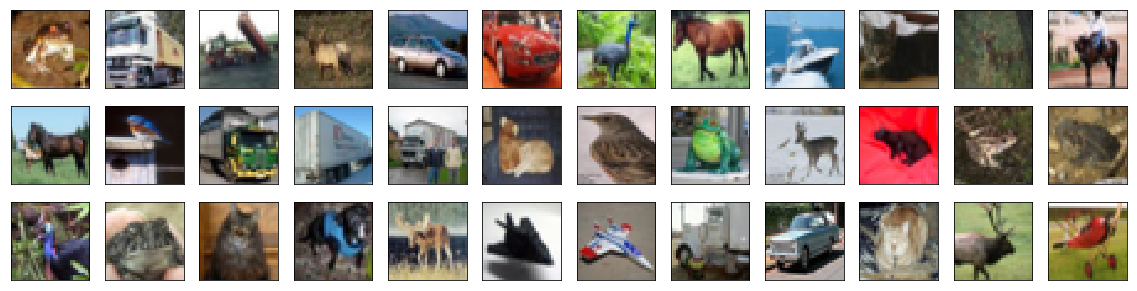

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### compile a model

In [28]:
from keras.models import Sequential
from keras.layers import (Activation,
                          Conv2D, Dense,
                          Dropout, Flatten,
                          MaxPool2D)
from keras.optimizers import SGD, RMSprop

from keras.callbacks import ModelCheckpoint

In [43]:
def plot_learning_curves(history, epochs=200, y_min=0):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)
#     plt.figure(2)
    plt.subplot(212)
    plt.plot(history.history['val_acc'], label='Val Accuracy')
    plt.plot(history.history['acc'], label = 'Training Accuracy')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)

In [57]:
def norm(arr):
    return arr / 255.0

def denorm(arr):
    return (arr * 255).astype(int)

In [59]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
model.summary()

opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# opt = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_67 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 64)        18496     
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 24s 590us/step - loss: 1.5880 - acc: 0.4265 - val_loss: 1.1870 - val_acc: 0.5729
Epoch 2/10
40000/40000 [==============================] - 23s 566us/step - loss: 1.1532 - acc: 0.5931 - val_loss: 0.9959 - val_acc: 0.6478
Epoch 3/10
40000/40000 [==============================] - 23s 565us/step - loss: 1.0217 - acc: 0.6447 - val_loss: 0.9170 - val_acc: 0.6779
Epoch 4/10
40000/40000 [==============================] - 23s 566us/step - loss: 0.9668 - acc: 0.6698 - val_loss: 0.8699 - val_acc: 0.6978
Epoch 5/10
40000/40000 [==============================] - 22s 556us/step - loss: 0.9439 - acc: 0.6773 - val_loss: 0.9027 - val_acc: 0.6971
Epoch 6/10
40000/40000 [==============================] - 22s 554us/step - loss: 0.9528 - acc: 0.6798 - val_loss: 0.9133 - val_acc: 0.7061
Epoch 7/10
40000/40000 [==============================] - 22s 553us/step - loss: 0.9726 - acc: 0.6784 - val_loss: 0.

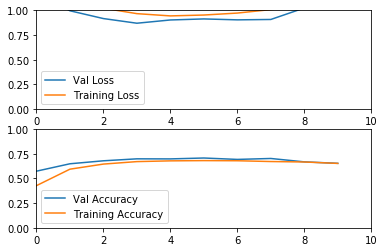

In [60]:
EPOCHS = 10
checkpoint = ModelCheckpoint('best_model.hdf5', verbose=1, save_best_only=True)
history = model.fit(norm(x_train), y_train, epochs=EPOCHS,
                    batch_size=32, validation_split=.2,
                    callbacks=[checkpoint])
plot_learning_curves(history, EPOCHS)

In [61]:
model.load_weights('best_model.hdf5')

In [62]:
x_test, y_test = test_data

In [66]:
loss, acc = model.evaluate(norm(x_test), keras.utils.to_categorical(y_test))
print('acc: {}\nloss: {}'.format(acc, loss))

10000/10000 [==============================] - 2s 185us/step
acc: 0.6982
loss: 0.8673934634208679


In [99]:
def examples(x_test, y_test):
    y_hat = model.predict(norm(x_test))

    cifar10_labels = ['airplane', 'automobile', 'bird', 'cat',
                      'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    fig = plt.figure(figsize=(20, 8))
    for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
        ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_test[idx]))
        pred_idx = np.argmax(y_hat[idx])
        true_idx = y_test[idx][0]
        ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

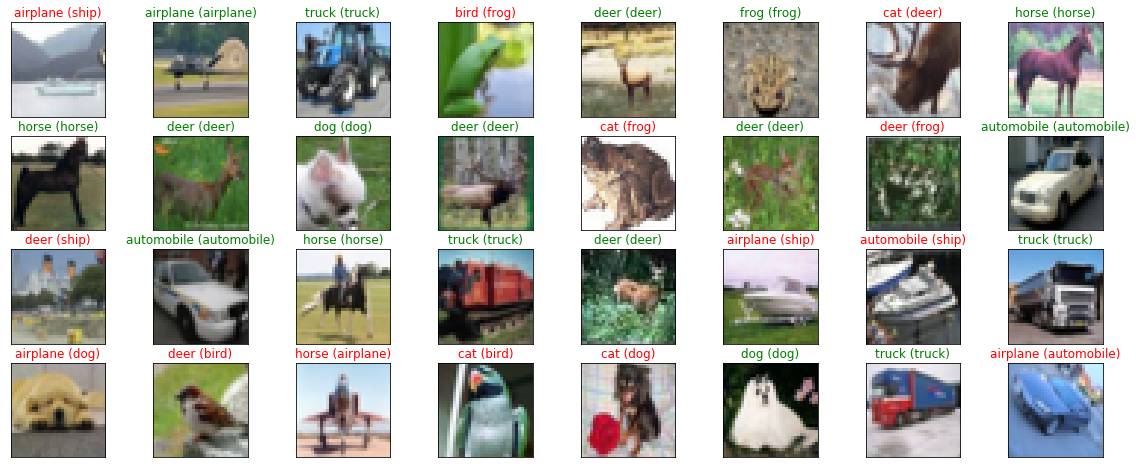

In [100]:
examples(x_test, y_test)

# Try now with data augmentation

In [44]:
training_data, test_data = cifar10.load_data()

In [45]:
x_train, y_train = training_data
x_test, y_test = test_data
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

def norm(arr):
    return arr / 255.0


def denorm(arr):
    return (arr * 255).astype(int)


x_train = norm(x_train)
x_test = norm(x_test)

In [46]:
x_valid, y_valid = x_train[:10000], y_train[:10000]
x_train, y_train = x_train[10000:], y_train[10000:]

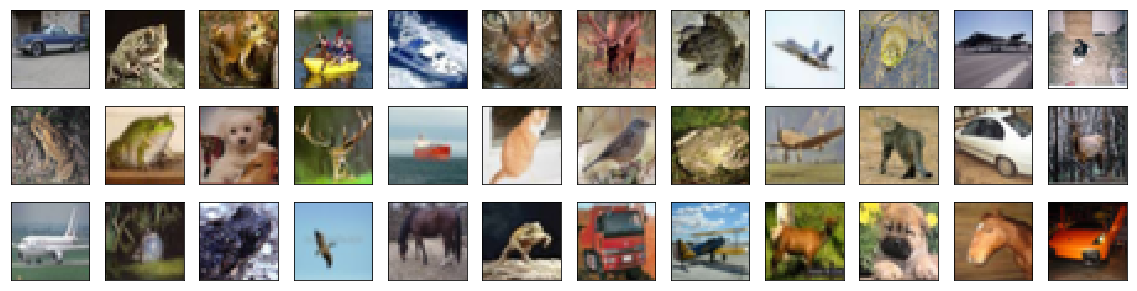

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### compile a model

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import (Activation,
                          Conv2D, Dense,
                          Dropout, Flatten,
                          MaxPool2D)
from keras.optimizers import SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [7]:
def plot_learning_curves(history, epochs=200, y_min=0):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)
#     plt.figure(2)
    plt.subplot(212)
    plt.plot(history.history['val_acc'], label='Val Accuracy')
    plt.plot(history.history['acc'], label = 'Training Accuracy')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)



In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3), padding='same'))
# model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
model.summary()

opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# opt = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    samplewise_std_normalization=False,
    featurewise_std_normalization=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen_val = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    samplewise_std_normalization=False,
    featurewise_std_normalization=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

In [122]:
datagen.fit(x_train)
datagen_val.fit(x_valid)

Epoch 1/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5223 - acc: 0.4634 - val_loss: 1.2176 - val_acc: 0.5811
Epoch 2/10
1250/1250 [==============================] - 21s 16ms/step - loss: 1.2581 - acc: 0.5625 - val_loss: 1.1760 - val_acc: 0.5820
Epoch 3/10
1250/1250 [==============================] - 21s 16ms/step - loss: 1.1751 - acc: 0.5923 - val_loss: 1.2195 - val_acc: 0.5721
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1311 - acc: 0.6087 - val_loss: 1.0548 - val_acc: 0.6310
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1014 - acc: 0.6180 - val_loss: 1.2141 - val_acc: 0.5853
Epoch 6/10
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0714 - acc: 0.6304 - val_loss: 1.0284 - val_acc: 0.6469
Epoch 7/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0539 - acc: 0.6346 - val_loss: 1.0436 - val_acc: 0.6422
Epoch 8/10
1250/1250 [==========================

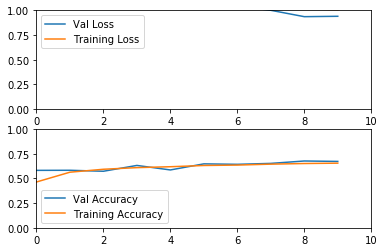

In [130]:
EPOCHS = 10
BATCH = 32
checkpoint = ModelCheckpoint('best_model.hdf5', verbose=1, save_best_only=True)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=BATCH),
                              epochs=EPOCHS,
                              callbacks=[checkpoint], use_multiprocessing=True,
                              validation_data=datagen_val.flow(x_valid, y_valid, batch_size=BATCH),
                              validation_steps=x_valid.shape[0] // BATCH)
plot_learning_curves(history, EPOCHS)

In [11]:
model.load_weights('best_model.hdf5')

In [12]:
loss, acc = model.evaluate(x_test, y_test)
print('acc: {}\nloss: {}'.format(acc, loss))

10000/10000 [==============================] - 2s 178us/step
acc: 0.6993
loss: 0.8785783514022827


In [14]:
def examples(x_test, y_test):
    y_hat = model.predict(x_test)

    cifar10_labels = ['airplane', 'automobile', 'bird', 'cat',
                      'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    fig = plt.figure(figsize=(20, 8))
    for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
        ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_test[idx]))
        pred_idx = np.argmax(y_hat[idx])
        true_idx = np.argmax(y_test[idx])
        try:
            ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                         color=("green" if pred_idx == true_idx else "red"))
        except:
            print(pred_idx)
            print(true_idx)
            break

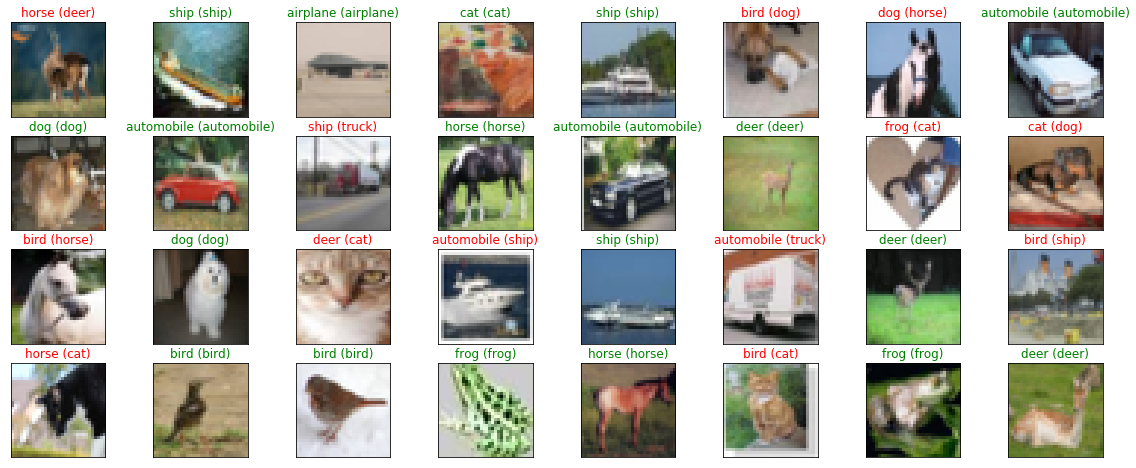

In [15]:
examples(x_test, y_test)

### From the augmented portion, let's look at the different layers and see what filters are learned and where we can improve

Where to begin

In [110]:
import keras.backend as K
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [47]:
image = x_test[0]

In [30]:
image -= image.mean()
image /= (image.std() + K.epsilon())
image *= 0.1

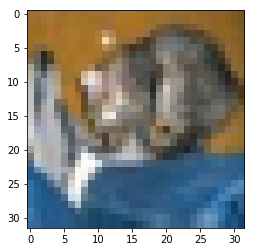

In [49]:
plt.imshow(image)

In [172]:
img_width = 32
img_height = 32

In [191]:
layer_name = 'conv2d_3'

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

layer_dict = dict([(layer.name, layer) for layer in model.layers])

def normalize(x):
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())

In [194]:
input_img = model.input
num_filters = layer_dict[layer_name].output.shape[3]

kept_filters = []
for filter_index in range(num_filters):
    print('processing filter %d' % filter_index)
    start_time = time.time()
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])
        
    grads = K.gradients(loss, input_img)[0]
    grads = normalize(grads)
    iterate = K.function([input_img], [loss, grads])
    step = 1.
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128
    for i in range(60):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        if loss_value <= 0.:
            break
            
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
        

processing filter 0
processing filter 1
processing filter 2
processing filter 3
processing filter 4
processing filter 5
processing filter 6
processing filter 7
processing filter 8
processing filter 9
processing filter 10
processing filter 11
processing filter 12
processing filter 13
processing filter 14
processing filter 15
processing filter 16
processing filter 17
processing filter 18
processing filter 19
processing filter 20
processing filter 21
processing filter 22
processing filter 23
processing filter 24
processing filter 25
processing filter 26
processing filter 27
processing filter 28
processing filter 29
processing filter 30
processing filter 31
processing filter 32
processing filter 33
processing filter 34
processing filter 35
processing filter 36
processing filter 37
processing filter 38
processing filter 39
processing filter 40
processing filter 41
processing filter 42
processing filter 43
processing filter 44
processing filter 45
processing filter 46
processing filter 47
pr

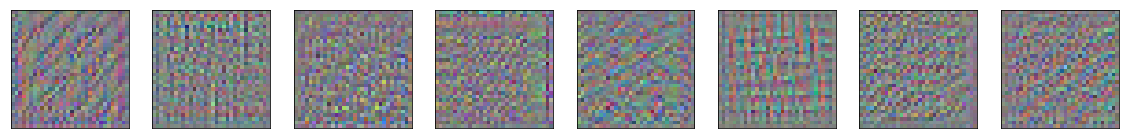

In [195]:
fig = plt.figure(figsize=(30, 30))
for i, (filtered, loss) in enumerate(kept_filters):
    ax = fig.add_subplot(6, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(filtered)
#     filtered

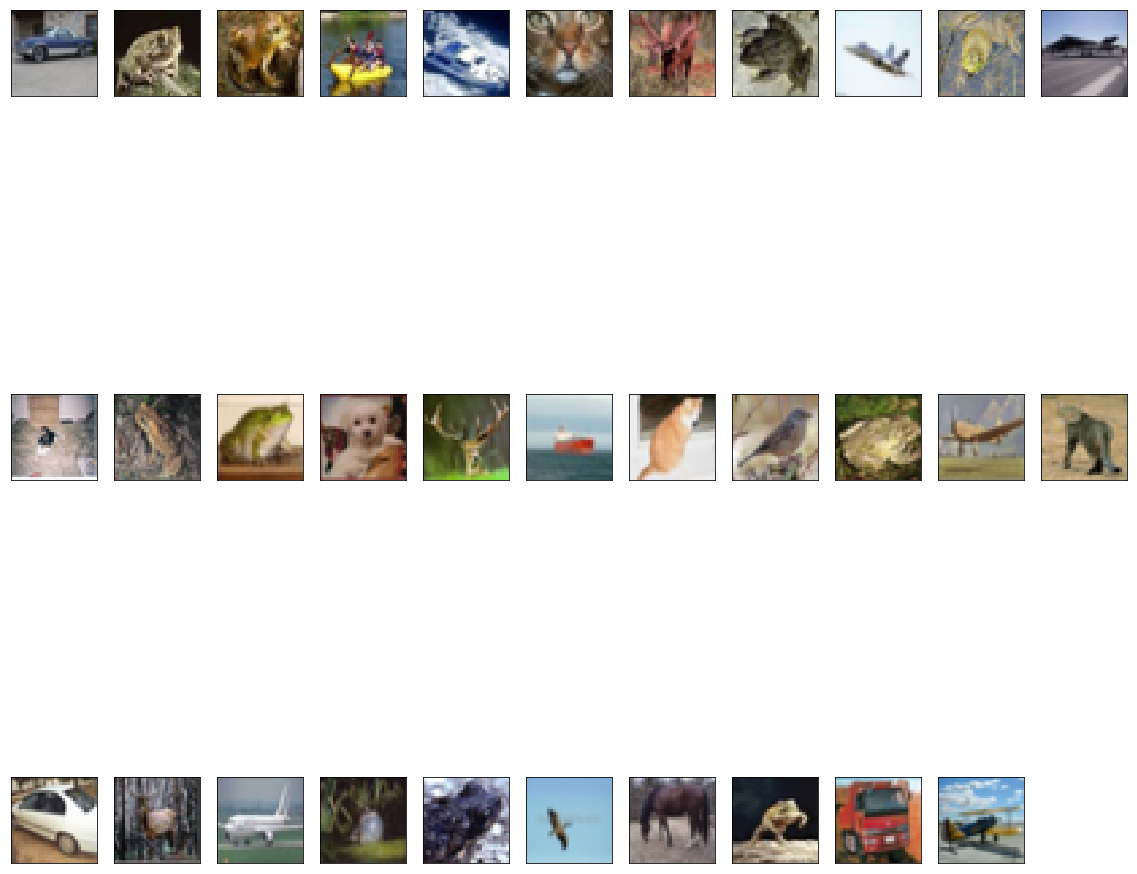

In [153]:
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(3, 11, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

# Using Sagemaker with S3 for training and putting models into s3

### set globals

In [2]:
from sagemaker import get_execution_role

role = get_execution_role()
bucket='sagemaker-us-west-2-305304641586'

### download data

RecordIO format is more efficient for sagemaker algorithms you need to convert data to this then send it to the buffer

In [6]:
%%time
import pickle, gzip, numpy, urllib.request, json

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

CPU times: user 2.27 s, sys: 428 ms, total: 2.7 s
Wall time: 5.69 s


### Explore the data

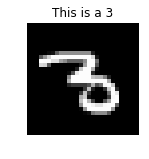

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (2,10)


def show_digit(img, caption='', subplot=None):
    if subplot==None:
        _,(subplot)=plt.subplots(1,1)
    imgr=img.reshape((28,28))
    subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)

show_digit(train_set[0][30], 'This is a {}'.format(train_set[1][30]))

### Transform the data to RecordIO format

In [8]:
%%time
from sagemaker.amazon.common import write_numpy_to_dense_tensor
import io
import boto3

data_key = 'kmeans_lowlevel_example/data'
data_location = 's3://{}/{}'.format(bucket, data_key)
print('training data will be uploaded to: {}'.format(data_location))

# Convert the training data into the format required by the SageMaker KMeans algorithm
buf = io.BytesIO()
write_numpy_to_dense_tensor(buf, train_set[0], train_set[1])
buf.seek(0)

# uploads the file object 'buf' which apparently uses write_numpy_to_dens_tensor (that RecordIO format probably)
# this makes sagemaker model training faster presumably
boto3.resource('s3').Bucket(bucket).Object(data_key).upload_fileobj(buf)

training data will be uploaded to: s3://sagemaker-us-west-2-305304641586/kmeans_lowlevel_example/data
CPU times: user 23.3 s, sys: 648 ms, total: 24 s
Wall time: 25.5 s


### Make the model

In [9]:
from sagemaker import KMeans

data_location = 's3://{}/kmeans_highlevel_example/data'.format(bucket)
output_location = 's3://{}/kmeans_example/output'.format(bucket)

print('training data will be uploaded to: {}'.format(data_location))
print('training artifacts will be uploaded to: {}'.format(output_location))

kmeans = KMeans(role=role,
                train_instance_count=2,
                train_instance_type='ml.c4.8xlarge',
                output_path=output_location,
                k=10,
                data_location=data_location)

training data will be uploaded to: s3://sagemaker-us-west-2-305304641586/kmeans_highlevel_example/data
training artifacts will be uploaded to: s3://sagemaker-us-west-2-305304641586/kmeans_example/output


notice that you specify the instance type to train the model.

In [11]:
%%time

kmeans.fit(kmeans.record_set(train_set[0]))

INFO:sagemaker:Creating training-job with name: kmeans-2018-02-04-21-08-16-498


....................................................................
Docker entrypoint called with argument(s): train
[02/04/2018 21:13:52 INFO 140167062005568] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', u'eval_metrics': u'["msd"]', u'_num_kv_servers': u'1', u'mini_batch_size': u'5000', u'half_life_time_size': u'0', u'_num_slices': u'1'}
[02/04/2018 21:13:52 INFO 140167062005568] Reading provided configuration from /opt/ml/input/config/hyperparameters.json: {u'feature_dim': u'784', u'mini_batch_size': u'500', u'k': u'10', u'force_dense': u'True'}
[02/04/2018 21:13:52 INFO 1401670620

===== Job Complete =====
CPU times: user 21.3 s, sys: 772 ms, total: 22 s
Wall time: 8min 6s


In [ ]:
kmeans_predictor = kmeans.deploy(initial_instance_count=)

In [14]:
import keras

ModuleNotFoundError: No module named 'keras'